In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# All

## 1) Importing Dataset for Sales Dataset and Ingredients Dataset


In [744]:
sales = pd.read_csv('pizza_sales.csv')
ingredients = pd.read_csv('pizza_ingredients.csv')

In [745]:
sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [746]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


## 2) Data Cleaning & Data Preprocessing

### Sales Dataset

In [749]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [750]:
sales.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [751]:
for column in sales.columns:
  print(f"{column}: {sales[column].nunique()}")

pizza_id: 48620
order_id: 21350
pizza_name_id: 91
quantity: 4
order_date: 358
order_time: 16382
unit_price: 25
total_price: 56
pizza_size: 5
pizza_category: 4
pizza_ingredients: 32
pizza_name: 32


In [752]:
# Total Price
sales['total_price'] = sales['total_price'].fillna(sales['unit_price'] * sales['quantity'])
sales['total_price'].isnull().sum()

0

In [753]:
# Pizza Category
cat_map = sales[['pizza_name_id', 'pizza_category']].dropna().drop_duplicates()
cat_map = cat_map.set_index('pizza_name_id')['pizza_category'].to_dict()

sales['pizza_category'] = sales['pizza_category'].fillna(sales['pizza_name_id'].map(cat_map))
sales['pizza_category'].isnull().sum()

0

In [754]:
# Pizza ingredients
ing_map = sales[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
ing_map = ing_map.set_index('pizza_name')['pizza_ingredients'].to_dict()

sales['pizza_ingredients'] = sales['pizza_ingredients'].fillna(sales['pizza_name'].map(ing_map))
sales['pizza_ingredients'].isnull().sum()

0

In [755]:
# Pizza Name
name_id_map = sales[['pizza_ingredients', 'pizza_name']].dropna().drop_duplicates()
name_id_map = name_id_map.set_index('pizza_ingredients')['pizza_name'].to_dict()

sales['pizza_name'] = sales['pizza_name'].fillna(sales['pizza_ingredients'].map(name_id_map))
sales['pizza_name'].isnull().sum()

0

In [756]:
# Pizza Name Id
name_id_map = sales[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
name_id_map = name_id_map.set_index('pizza_name')['pizza_name_id'].to_dict()

sales['pizza_name_id'] = sales['pizza_name_id'].fillna(sales['pizza_name'].map(name_id_map))
sales['pizza_name_id'].isnull().sum()

0

In [757]:
sales.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

### Ingredients Dataset

In [759]:
ingredients.columns

Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')

In [760]:
ingredients.shape

(518, 4)

In [761]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [762]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [763]:
ingredients.isna().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [764]:
ingredients.duplicated().sum()

0

In [765]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [766]:
ingredients[ingredients['Items_Qty_In_Grams'].isnull()]

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [767]:
ingredients[ingredients['pizza_name']=='The Brie Carre Pizza']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
22,brie_carre_s,The Brie Carre Pizza,Brie Carre Cheese,30.0
23,brie_carre_s,The Brie Carre Pizza,Prosciutto,30.0
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
25,brie_carre_s,The Brie Carre Pizza,Pears,10.0
26,brie_carre_s,The Brie Carre Pizza,Thyme,5.0
27,brie_carre_s,The Brie Carre Pizza,Garlic,5.0


In [768]:
ingredients[ingredients['pizza_ingredients']=='Sliced Ham']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [769]:
ingredients[ingredients['pizza_name_id']=='hawaiian_l']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
150,hawaiian_l,The Hawaiian Pizza,Pineapple,45.0
151,hawaiian_l,The Hawaiian Pizza,Mozzarella Cheese,30.0


In [770]:
ingredients.pizza_name.value_counts()

pizza_name
The Greek Pizza                               30
The Mexicana Pizza                            24
The Southwest Chicken Pizza                   24
The Spinach Supreme Pizza                     24
The Vegetables + Vegetables Pizza             24
The Mediterranean Pizza                       21
The California Chicken Pizza                  21
The Italian Vegetables Pizza                  21
The Chicken Alfredo Pizza                     18
The Calabrese Pizza                           18
The Spinach Pesto Pizza                       18
The Spicy Italian Pizza                       18
The Sicilian Pizza                            18
The Pepper Salami Pizza                       18
The Chicken Pesto Pizza                       18
The Barbecue Chicken Pizza                    18
The Italian Supreme Pizza                     18
The Italian Capocollo Pizza                   18
The Napolitana Pizza                          15
The Soppressata Pizza                         15
The Green

In [771]:
meanofPizza = ingredients.groupby('pizza_name')['Items_Qty_In_Grams'].mean()
ingredients['Items_Qty_In_Grams'] = ingredients['Items_Qty_In_Grams'].fillna(ingredients['pizza_name'].map(meanofPizza))

In [772]:
ingredients.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64



## 3) Merging sales dataset and ingredients dataset into a single dataframe

* Feature Engineering: Create relevant features from the sales data, such as
day of the week, month, promotional periods, and holiday effects.




In [774]:
df = pd.merge(sales, ingredients, on='pizza_name_id', how='left')

In [775]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_x,pizza_name_x,pizza_name_y,pizza_ingredients_y,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Sliced Ham,25.0
1,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Pineapple,30.0
2,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Mozzarella Cheese,20.0
3,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Pepperoni,40.0
4,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Mushrooms,40.0


In [776]:
print(df.duplicated().sum())
print(df.shape)
print(' ')
print(df.isnull().sum())

0
(267576, 15)
 
pizza_id               0
order_id               0
pizza_name_id          0
quantity               0
order_date             0
order_time             0
unit_price             0
total_price            0
pizza_size             0
pizza_category         0
pizza_ingredients_x    0
pizza_name_x           0
pizza_name_y           0
pizza_ingredients_y    0
Items_Qty_In_Grams     0
dtype: int64




## 4) Feature Engineering and Data Cleaning for Merged data Df



### 1--)  Data Cleaning





In [779]:
df[['pizza_name_x','pizza_name_y']]

,pizza_name_x,pizza_name_y
0,The Hawaiian Pizza,The Hawaiian Pizza
1,The Hawaiian Pizza,The Hawaiian Pizza
2,The Hawaiian Pizza,The Hawaiian Pizza
3,The Classic Deluxe Pizza,The Classic Deluxe Pizza
4,The Classic Deluxe Pizza,The Classic Deluxe Pizza
...,...,...
267571,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267572,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267573,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267574,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza


In [780]:
df[['pizza_ingredients_x','pizza_ingredients_y']]


,pizza_ingredients_x,pizza_ingredients_y
0,"Sliced Ham, Pineapple, Mozzarella Cheese",Sliced Ham
1,"Sliced Ham, Pineapple, Mozzarella Cheese",Pineapple
2,"Sliced Ham, Pineapple, Mozzarella Cheese",Mozzarella Cheese
3,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Pepperoni
4,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Mushrooms
...,...,...
267571,"Barbecued Chicken, Red Peppers, Green Peppers,...",Red Peppers
267572,"Barbecued Chicken, Red Peppers, Green Peppers,...",Green Peppers
267573,"Barbecued Chicken, Red Peppers, Green Peppers,...",Tomatoes
267574,"Barbecued Chicken, Red Peppers, Green Peppers,...",Red Onions


In [781]:
# Since they have same values it will be difficult to train so i'm removing the columns
df = df.drop(['pizza_name_y','pizza_ingredients_y'], axis=1)

In [782]:
df = df.rename(columns={'pizza_name_x':'pizza_name', 'pizza_ingredients_x':'pizza_ingredients'})

In [783]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name',
       'Items_Qty_In_Grams'],
      dtype='object')

In [784]:
df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            0
Items_Qty_In_Grams    0
dtype: int64

In [785]:
df.shape

(267576, 13)

In [786]:
df.duplicated().sum()

80204

In [787]:
df = df.drop_duplicates()

In [788]:
df.shape

(187372, 13)

In [789]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price,Items_Qty_In_Grams
count,187372.000000,187372.000000,187372.000000,187372.000000,187372.000000,187372.000000
mean,24312.676030,10702.312405,1.019250,16.914338,17.244843,37.652904
std,14039.560378,6181.841091,0.141575,3.571451,4.419979,35.704833
min,1.000000,1.000000,1.000000,9.750000,9.750000,5.000000
25%,12166.750000,5344.000000,1.000000,12.750000,12.750000,15.000000
50%,24266.000000,10661.000000,1.000000,16.750000,16.750000,25.000000
75%,36494.250000,16112.250000,1.000000,20.500000,20.750000,45.000000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000,200.000000


In [790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187372 entries, 0 to 267573
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pizza_id            187372 non-null  int64  
 1   order_id            187372 non-null  int64  
 2   pizza_name_id       187372 non-null  object 
 3   quantity            187372 non-null  int64  
 4   order_date          187372 non-null  object 
 5   order_time          187372 non-null  object 
 6   unit_price          187372 non-null  float64
 7   total_price         187372 non-null  float64
 8   pizza_size          187372 non-null  object 
 9   pizza_category      187372 non-null  object 
 10  pizza_ingredients   187372 non-null  object 
 11  pizza_name          187372 non-null  object 
 12  Items_Qty_In_Grams  187372 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 20.0+ MB


### 2--) Changing Date format and dtype

In [792]:
# Changing Order_data dtype object into date
if 'order_date' in df.columns:
  df['order_date'] = df['order_date'].str.replace('/', '-')

In [793]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')

In [794]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')

In [795]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267565,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,60.0
267567,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,100.0
267570,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,20.0
267571,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,5.0


In [796]:
df['order_day_of_week'] = df['order_date'].dt.dayofweek
df['order_month_name'] = df['order_date'].dt.month
df['week_of_year'] = df['order_date'].dt.isocalendar().week
df['order_year'] = df['order_date'].dt.year

In [797]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,order_day_of_week,order_month_name,week_of_year,order_year
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0,3,1,1,2015
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0,3,1,1,2015
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0,3,1,1,2015
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0,3,1,1,2015
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0,3,1,1,2015


### 3--) Holidays of US from the library called Holidays

In [799]:
import holidays

us_holidays = holidays.US()

df['holiday'] = df['order_date'].apply(lambda x: 1 if x in us_holidays else 0)

df[['order_date', 'holiday']].head()

,order_date,holiday
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
6,2015-01-01,1


### 4--) Promotional Period On weekends

In [801]:
df['promotion'] = df['order_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)  # 1- sat/sun and 0 - Weekdays
df[['order_date', 'promotion']].sample(10)

,order_date,promotion
209530,2015-10-11,1
231718,2015-11-12,0
208453,2015-10-10,1
88171,2015-04-28,0
261240,2015-12-20,1
180414,2015-08-30,1
145956,2015-07-14,0
86166,2015-04-25,1
63878,2015-03-27,0
116720,2015-06-05,0


In [802]:
from datetime import datetime

# Define the date
date_str = "2015-10-24"
date_obj = datetime.strptime(date_str, "%Y-%m-%d")

day_of_week = date_obj.strftime("%A")

print(f"The day of the week for {date_str} is {day_of_week}.")


The day of the week for 2015-10-24 is Saturday.


In [803]:
df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            0
Items_Qty_In_Grams    0
order_day_of_week     0
order_month_name      0
week_of_year          0
order_year            0
holiday               0
promotion             0
dtype: int64

In [804]:
df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,order_day_of_week,order_month_name,week_of_year,order_year,holiday,promotion
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0,3,1,1,2015,1,0
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0,3,1,1,2015,1,0
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0,3,1,1,2015,1,0
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0,3,1,1,2015,1,0
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0,3,1,1,2015,1,0


In [805]:
# daily sales by quantity

daily_sales_by_quantity = df.groupby('order_date')['quantity'].sum().reset_index()
daily_sales_by_quantity


# daily_sales.set_index('order_date')

,order_date,quantity
0,2015-01-01,620
1,2015-01-02,631
2,2015-01-03,618
3,2015-01-04,414
4,2015-01-05,482
...,...,...
353,2015-12-27,347
354,2015-12-28,381
355,2015-12-29,302
356,2015-12-30,327


In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187372 entries, 0 to 267573
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pizza_id            187372 non-null  int64         
 1   order_id            187372 non-null  int64         
 2   pizza_name_id       187372 non-null  object        
 3   quantity            187372 non-null  int64         
 4   order_date          187372 non-null  datetime64[ns]
 5   order_time          187372 non-null  object        
 6   unit_price          187372 non-null  float64       
 7   total_price         187372 non-null  float64       
 8   pizza_size          187372 non-null  object        
 9   pizza_category      187372 non-null  object        
 10  pizza_ingredients   187372 non-null  object        
 11  pizza_name          187372 non-null  object        
 12  Items_Qty_In_Grams  187372 non-null  float64       
 13  order_day_of_week   187372 non-nul



## 5) Data Visualization (Exploratory Data Analysis - EDA)

In [808]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,order_day_of_week,order_month_name,week_of_year,order_year,holiday,promotion
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0,3,1,1,2015,1,0
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0,3,1,1,2015,1,0
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0,3,1,1,2015,1,0
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0,3,1,1,2015,1,0
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0,3,1,1,2015,1,0


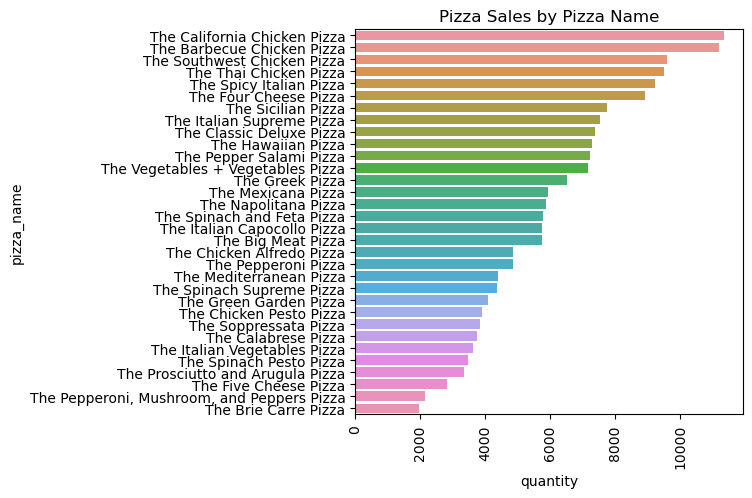

In [955]:
# pizza sales by pizza name group by pizza name and use barplot

pizza_sales = df.groupby('pizza_name')['quantity'].sum().reset_index()
pizza_sales = pizza_sales.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(5, 5))
sns.barplot(x='quantity', y='pizza_name', data=pizza_sales) # for top 10 [pizza_sales.head(10)]
plt.xticks(rotation=90)
plt.xlabel('quantity')
plt.ylabel('pizza_name')
plt.title('Pizza Sales by Pizza Name')
plt.show()

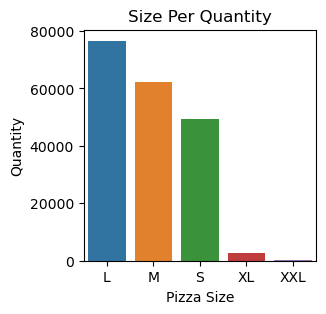

In [957]:
# size per quantity

pizza_size = df.groupby('pizza_size')['quantity'].sum().reset_index()

plt.figure(figsize=(3, 3))
sns.barplot(x='pizza_size', y='quantity', data=pizza_size)
plt.xlabel('Pizza Size')
plt.ylabel('Quantity')
plt.title('Size Per Quantity')
plt.show()

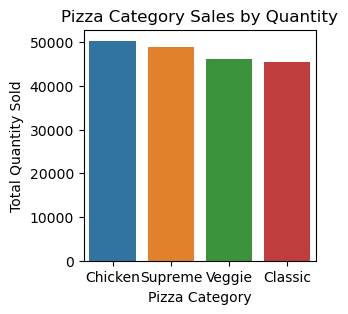

In [959]:
# Calculate pizza category sales by quantity
pizza_category_sales = df.groupby('pizza_category')['quantity'].sum().reset_index()
pizza_category_sales = pizza_category_sales.sort_values(by='quantity', ascending=False)

# Create the bar plot
plt.figure(figsize=(3, 3))
sns.barplot(x='pizza_category', y='quantity', data=pizza_category_sales)

plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.title('Pizza Category Sales by Quantity')
plt.show()

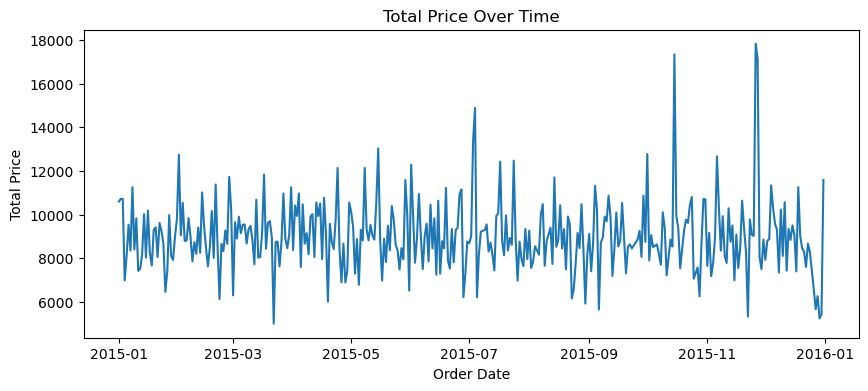

In [965]:
sales_over_time = df.groupby('order_date')['total_price'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(x='order_date', y='total_price', data=sales_over_time)
plt.title('Total Price Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Price')
plt.show()

In [813]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name',
       'Items_Qty_In_Grams', 'order_day_of_week', 'order_month_name',
       'week_of_year', 'order_year', 'holiday', 'promotion'],
      dtype='object')

### Seasonal trend analysis

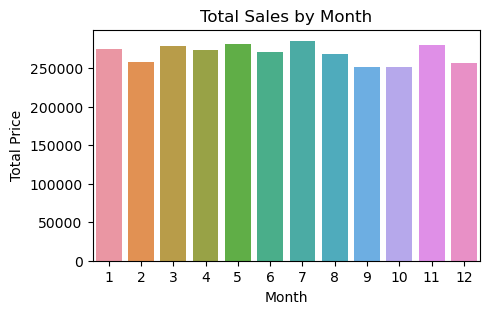

In [979]:
# order_month with total price eda
order_month_sales = df.groupby('order_month_name')['total_price'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x='order_month_name', y='total_price', data=order_month_sales)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

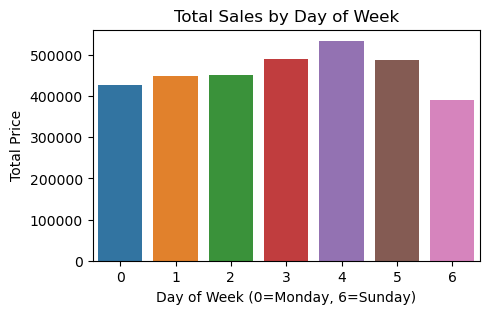

In [981]:
# day of week with total price
sales_by_day = df.groupby('order_day_of_week')['total_price'].sum().reset_index()


# ['Monday-0', 'Tuesday-1', 'Wednesday-2', 'Thursday-3', 'Friday-4', 'Saturday-5', 'Sunday-6']
plt.figure(figsize=(5, 3))
sns.barplot(x='order_day_of_week', y='total_price', data=sales_by_day)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Price')
plt.show()

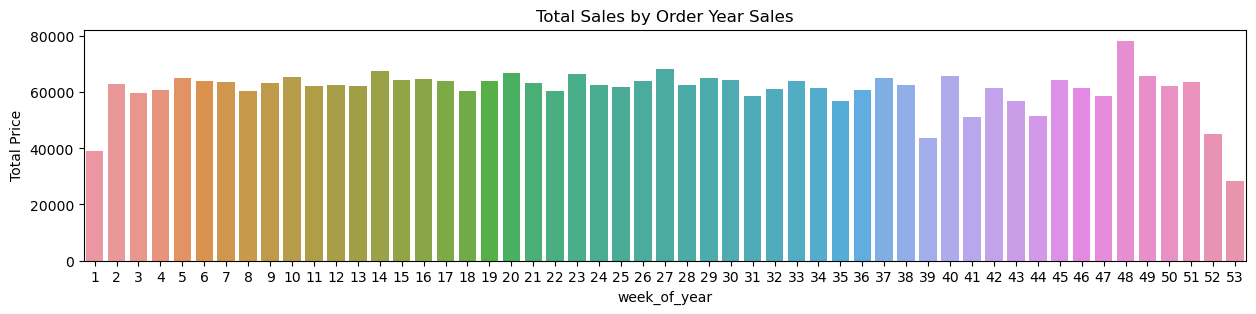

In [995]:
# day of week with total price
order_week_of_year_sales = df.groupby('week_of_year')['total_price'].sum().reset_index()

plt.figure(figsize=(15, 3))
sns.barplot(x='week_of_year', y='total_price', data = order_week_of_year_sales)
plt.title('Total Sales by Order Year Sales')
plt.xlabel('week_of_year')
plt.ylabel('Total Price')
plt.show()

### Finding Coorelation

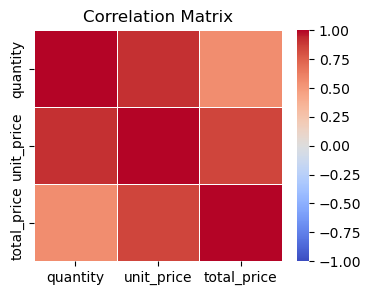

In [818]:
# Correlation matrix using Heat Map

numeric_df = df[['quantity', 'unit_price', 'total_price']].corr()
corr_matrix= numeric_df.corr().abs()

plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5) # ,annot=True
plt.title('Correlation Matrix')
plt.show()

In [819]:
corr_matrix

,quantity,unit_price,total_price
quantity,1.000000,0.912774,0.560024
unit_price,0.912774,1.000000,0.849580
total_price,0.560024,0.849580,1.000000


## 6) Model Selection

### ARIMA

In [822]:
!pip install pmdarima
import warnings
warnings.filterwarnings("ignore")

In [823]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error as mape

# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregate sales by day
daily_sales = df.groupby('order_date')['quantity'].sum()

# Apply a 7-day moving average to smooth the data
daily_sales_smoothed = daily_sales.rolling(window=7, min_periods=1).mean() # averaging each day’s sales with the past 6 days sales.

# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(daily_sales_smoothed))
train, test = daily_sales_smoothed[:train_size], daily_sales_smoothed[train_size:]

In [927]:
# Model Training
print("\n Training ARIMA Model...")
stepwise_fit = auto_arima(train, seasonal=False, trace=True)
p, d, q = stepwise_fit.order
print(f" Optimal ARIMA order: p={p}, d={d}, q={q}")

# Train ARIMA model on smoothed training data
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()


 Training ARIMA Model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2319.928, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4406.788, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4036.356, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2336.468, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2322.833, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2320.762, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2338.015, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2338.137, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2320.313, Time=0.57 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2308.911, Time=0.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2308.145, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0

In [825]:
# Evaluation (MAPE Calculation)
print("\n Evaluating Model Performance...")
test_predictions = model_fit.forecast(steps=len(test))
mape_score = mape(test, test_predictions) * 100  # Convert to percentage
print(f"Mean Absolute Percentage Error (MAPE): {mape_score:.2f}%")


 Evaluating Model Performance...
Mean Absolute Percentage Error (MAPE): 5.83%


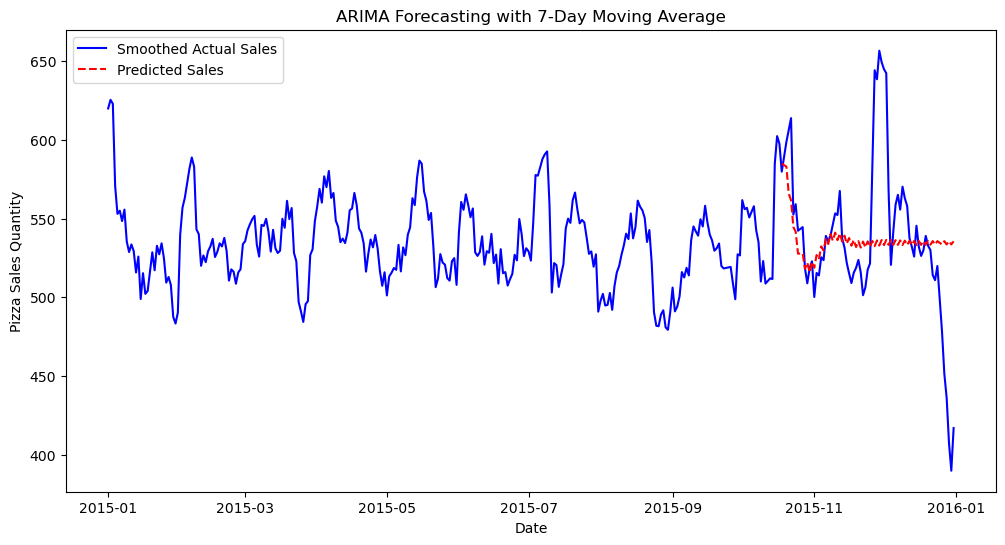

In [826]:
# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_smoothed, label="Smoothed Actual Sales", color='blue')
plt.plot(test.index, test_predictions, label="Predicted Sales", color='red', linestyle="dashed")
plt.legend()
plt.title("ARIMA Forecasting with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Pizza Sales Quantity")
plt.show()

In [827]:
# Prediction for Next Week
print("\n Predicting Next Week's Sales...")
future_dates = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=7)
predicted_sales = model_fit.forecast(steps=7)

# Create a DataFrame for predicted sales
predicted_sales_df = pd.DataFrame({'order_date': future_dates, 'predicted_quantity': predicted_sales})

print("\n Predicted Pizza Sales for Next 7 Days:")
predicted_sales_df


 Predicting Next Week's Sales...

 Predicted Pizza Sales for Next 7 Days:


,order_date,predicted_quantity
286,2016-01-01,584.921624
287,2016-01-02,583.050289
288,2016-01-03,565.944283
289,2016-01-04,561.600767
290,2016-01-05,544.617146
291,2016-01-06,541.624964
292,2016-01-07,527.662945


In [828]:
# 1) Aggregate Actual Sales Ratio for Pizzas
pizza_sales_ratio = (
    df.groupby(['pizza_name_id', 'pizza_size', 'pizza_ingredients'])['quantity']
    .sum()
    .reset_index()
)

# Normalize to get each pizza's proportion of total sales
pizza_sales_ratio['sales_ratio'] = pizza_sales_ratio['quantity'] / pizza_sales_ratio['quantity'].sum()



# 2) Apply Ratio to Predicted Sales
# Calculate total predicted sales for next week
total_predicted_sales = predicted_sales_df['predicted_quantity'].sum()

# Distribute the total predicted sales across different pizza types
pizza_sales_ratio['predicted_quantity'] = pizza_sales_ratio['sales_ratio'] * total_predicted_sales



# 3) Calculate Ingredient Requirements
# Merge with ingredient details
future_sales = pizza_sales_ratio.merge(
    df[['pizza_name_id', 'pizza_size', 'pizza_ingredients', 'Items_Qty_In_Grams']].drop_duplicates(),
    on=['pizza_name_id', 'pizza_size', 'pizza_ingredients'],
    how='left'
)

# Compute total required ingredient quantity
future_sales['Total_Required_Quantity_Grams'] = (
    future_sales['predicted_quantity'] * future_sales['Items_Qty_In_Grams']
)

# 4) Summarize Ingredient Requirements
ingredient_requirements = (
    future_sales.groupby(['pizza_name_id', 'pizza_size', 'pizza_ingredients'], as_index=False)
    .agg({'Total_Required_Quantity_Grams': 'sum'})
)

# Display result
ingredient_requirements

# Save the ingredient requirements to a CSV file
ingredient_requirements.to_csv('ingredient_requirements.csv', index=False)

In [829]:
ingredient_requirements

,pizza_name_id,pizza_size,pizza_ingredients,Total_Required_Quantity_Grams
0,bbq_ckn_l,L,"Barbecued Chicken, Red Peppers, Green Peppers,...",16736.110809
1,bbq_ckn_m,L,"Barbecued Chicken, Red Peppers, Green Peppers,...",11.770497
2,bbq_ckn_m,M,"Barbecued Chicken, Red Peppers, Green Peppers,...",11252.594700
3,bbq_ckn_s,S,"Barbecued Chicken, Red Peppers, Green Peppers,...",1040.307191
4,big_meat_s,S,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",24683.652430
...,...,...,...,...
96,the_greek_xxl,S,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",46.570225
97,the_greek_xxl,XXL,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",1303.966313
98,veggie_veg_l,L,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",7429.742125
99,veggie_veg_m,M,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",7474.265308


In [830]:
# Aggregate Ingredient Requirements
ingredient_summary = (
    ingredient_requirements.groupby(['pizza_ingredients'], as_index=False)
    .agg({'Total_Required_Quantity_Grams': 'sum'})
)

# Display result
ingredient_summary

# Save the ingredient summary to a CSV file
ingredient_summary.to_csv('ingredient_summary.csv', index=False)

In [831]:
ingredient_summary

,pizza_ingredients,Total_Required_Quantity_Grams
0,"?duja Salami, Pancetta, Tomatoes, Red Onions, ...",10916.060850
1,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",24683.652430
2,"Barbecued Chicken, Red Peppers, Green Peppers,...",29040.783195
3,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2447.444465
4,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",30046.085953
5,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",23009.580764
6,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",41773.082839
7,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",44826.144939
8,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",37128.444901
9,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",19271.168709


In [928]:
import pickle

# Save the trained ARIMA model
with open("arima_model.pkl", "wb") as model_file:
    pickle.dump(model_fit, model_file)
print("---------------- ARIMA model saved successfully!----------------")

---------------- ARIMA model saved successfully!----------------


### SARIMA

In [834]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt
import pickle

# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregate sales by day
daily_sales = df.groupby('order_date')['quantity'].sum()

# Apply a 7-day moving average to smooth the data
daily_sales_smoothed = daily_sales.rolling(window=7, min_periods=1).mean()  # averaging each day’s sales with the past 6 days sales.

# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(daily_sales_smoothed))
train, test = daily_sales_smoothed[:train_size], daily_sales_smoothed[train_size:]

In [931]:
# Model Training (SARIMA)
print("\n Training SARIMA Model...")

# Fit SARIMA model using auto_arima for seasonal parameters
stepwise_fit = auto_arima(train, seasonal=True, m=7, trace=True, suppress_warnings=True)
p, d, q = stepwise_fit.order
P, D, Q, S = stepwise_fit.seasonal_order
print(f" Optimal SARIMA order: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, S={S}")

# Train SARIMA model on smoothed training data
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()


 Training SARIMA Model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2671.876, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2252.215, Time=0.63 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2457.015, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=4406.788, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2316.620, Time=0.12 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=2247.033, Time=2.14 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=2224.845, Time=2.32 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=2652.714, Time=1.47 sec
 ARIMA(2,0,0)(2,0,1)[7] intercept   : AIC=2226.285, Time=2.20 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=2225.355, Time=2.68 sec
 ARIMA(0,0,1)(2,0,1)[7] in

In [836]:
# Evaluation (MAPE Calculation)

print("\n Evaluating Model Performance...")
test_predictions = model_fit.forecast(steps=len(test))
mape_score = mape(test, test_predictions) * 100  # Convert to percentage
print(f"Mean Absolute Percentage Error (MAPE): {mape_score:.2f}%")


 Evaluating Model Performance...
Mean Absolute Percentage Error (MAPE): 6.15%


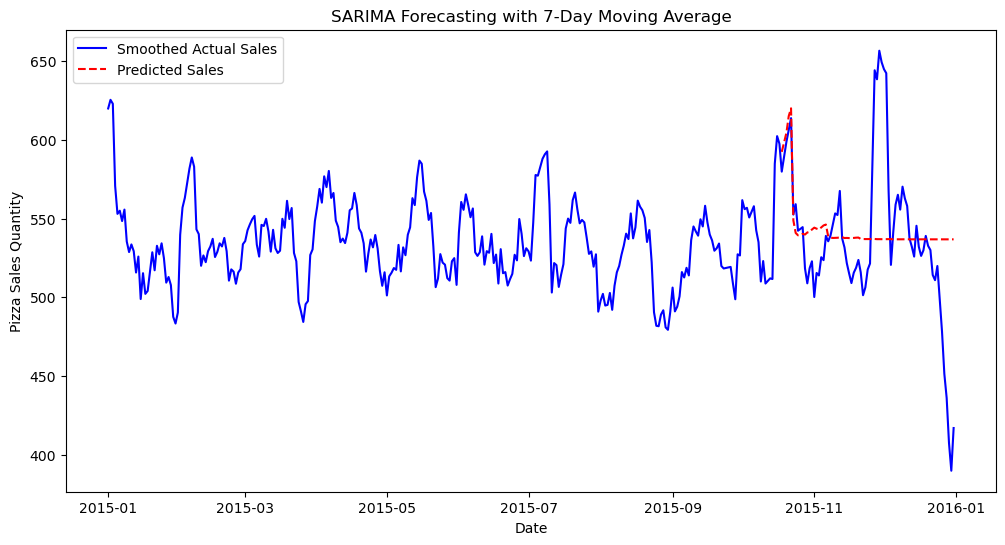

In [837]:
# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_smoothed, label="Smoothed Actual Sales", color='blue')
plt.plot(test.index, test_predictions, label="Predicted Sales", color='red', linestyle="dashed")
plt.legend()
plt.title("SARIMA Forecasting with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Pizza Sales Quantity")
plt.show()

In [838]:
# Prediction for Next Week
print("\n Predicting Next Week's Sales...")
future_dates = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=7)
predicted_sales = model_fit.forecast(steps=7)

# Create a DataFrame for predicted sales
predicted_sales_df = pd.DataFrame({'order_date': future_dates, 'predicted_quantity': predicted_sales})

print("\n Predicted Pizza Sales for Next 7 Days:")
predicted_sales_df


 Predicting Next Week's Sales...

 Predicted Pizza Sales for Next 7 Days:


,order_date,predicted_quantity
286,2016-01-01,592.414596
287,2016-01-02,604.476815
288,2016-01-03,615.120588
289,2016-01-04,620.102158
290,2016-01-05,548.812724
291,2016-01-06,540.861994
292,2016-01-07,539.371779


In [839]:
# 1: Aggregate Actual Sales Ratio for Pizzas
# Get past sales distribution per pizza type
pizza_sales_ratio = (
    df.groupby(['pizza_name_id', 'pizza_size', 'pizza_ingredients'])['quantity']
    .sum()
    .reset_index()
)

# Normalize to get each pizza's proportion of total sales
pizza_sales_ratio['sales_ratio'] = pizza_sales_ratio['quantity'] / pizza_sales_ratio['quantity'].sum()

# 2: Apply Ratio to Predicted Sales
# Calculate total predicted sales for next week
total_predicted_sales = predicted_sales_df['predicted_quantity'].sum()

# Distribute the total predicted sales across different pizza types
pizza_sales_ratio['predicted_quantity'] = pizza_sales_ratio['sales_ratio'] * total_predicted_sales


# 3: Calculate Ingredient Requirements

# Merge with ingredient details
future_sales = pizza_sales_ratio.merge(
    df[['pizza_name_id', 'pizza_size', 'pizza_ingredients', 'Items_Qty_In_Grams']].drop_duplicates(),
    on=['pizza_name_id', 'pizza_size', 'pizza_ingredients'],
    how='left'
)

# Compute total required ingredient quantity
future_sales['Total_Required_Quantity_Grams'] = (
    future_sales['predicted_quantity'] * future_sales['Items_Qty_In_Grams']
)

# 4: Summarize Ingredient Requirements

ingredient_requirements = (
    future_sales.groupby(['pizza_name_id', 'pizza_size', 'pizza_ingredients'], as_index=False)
    .agg({'Total_Required_Quantity_Grams': 'sum'})
)

# Display result
ingredient_requirements

# Save the ingredient requirements to a CSV file
# ingredient_requirements.to_csv('ingredient_requirements.csv', index=False)

,pizza_name_id,pizza_size,pizza_ingredients,Total_Required_Quantity_Grams
0,bbq_ckn_l,L,"Barbecued Chicken, Red Peppers, Green Peppers,...",17385.699065
1,bbq_ckn_m,L,"Barbecued Chicken, Red Peppers, Green Peppers,...",12.227352
2,bbq_ckn_m,M,"Barbecued Chicken, Red Peppers, Green Peppers,...",11689.348104
3,bbq_ckn_s,S,"Barbecued Chicken, Red Peppers, Green Peppers,...",1080.685229
4,big_meat_s,S,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",25641.713172
...,...,...,...,...
96,the_greek_xxl,S,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",48.377782
97,the_greek_xxl,XXL,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",1354.577905
98,veggie_veg_l,L,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",7718.116963
99,veggie_veg_m,M,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",7764.368249


In [840]:
# -------------------------------
# Step 1: Aggregate Ingredient Requirements
# -------------------------------
ingredient_summary = (
    ingredient_requirements.groupby(['pizza_ingredients'], as_index=False)
    .agg({'Total_Required_Quantity_Grams': 'sum'})
)

# Display result
ingredient_summary

# Save the ingredient summary to a CSV file
# ingredient_summary.to_csv('ingredient_summary.csv', index=False)

,pizza_ingredients,Total_Required_Quantity_Grams
0,"?duja Salami, Pancetta, Tomatoes, Red Onions, ...",11339.752174
1,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",25641.713172
2,"Barbecued Chicken, Red Peppers, Green Peppers,...",30167.959751
3,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2542.438529
4,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",31212.281900
5,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",23902.664804
6,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",43394.445435
7,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",46566.007783
8,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",38569.532504
9,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",20019.151620


In [932]:
'''
with open("sarima_model.pkl", "wb") as model_file:
    pickle.dump(model_fit, model_file)
print(" SARIMA model saved successfully!")

'''

'\nwith open("sarima_model.pkl", "wb") as model_file:\n    pickle.dump(model_fit, model_file)\nprint(" SARIMA model saved successfully!")\n\n'